In [1]:
import pandas as pd

Скачаем данные

In [7]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls')

In [5]:
!pip install xlrd

# 1) Описываем датасет

In [8]:
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Видим 1080 рядов = измерений, 77 белок в колонках, колонка Genotype, Treament, Behavior, Class.
Группа мышей - это Class, зависит от поведения и treatment

По каждой мыши сделано 15 измерений (записаны в строках, считаются независимыми)


c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

Узнаем, что там с пропущенными значениями

In [21]:
pd.unique(data['Genotype']) #Видим, что в датасете есть мыши с синдромом Дауна и контрольные

array(['Control', 'Ts65Dn'], dtype=object)

In [26]:
data['Genotype'].describe() #видим, что контрольных измерений 570. Судя по структуре названия id измерений, 
#на каждую мышь делалось 15 измерений (J3295_1 - J3295_15)

count        1080
unique          2
top       Control
freq          570
Name: Genotype, dtype: object

In [28]:
pd.unique(data['class']) #видим, что итого выделено 8 классов(групп) мышей, группа зависит от того контроль это или синдром Дауна, от типа лечения и поведения

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [ ]:
И действительно в описании датасета такая информация о группах: 
    
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

Посчитаем, сколько измерений в каждой группе, все соответсвует описанию датасета сверху, в целом группы в меру сбалансированы

In [30]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [11]:
pd.isnull(data).sum().sum()

1396

У нас всего 1396 пропущенных значений во всем датасете

# 2) Узнаем, есть ли различия в экспрессии BDNF_N в зависимости от группы (класса)

In [83]:
BDNF_N_data = data[['class', 'BDNF_N']].copy()
BDNF_N_data


,class,BDNF_N
0,c-CS-m,0.430175
1,c-CS-m,0.411770
2,c-CS-m,0.418309
3,c-CS-m,0.358626
4,c-CS-m,0.358802
...,...,...
1075,t-SC-s,0.254860
1076,t-SC-s,0.251638
1077,t-SC-s,0.234118
1078,t-SC-s,0.243974


In [91]:
BDNF_N_data.isnull().sum()

class     0
BDNF_N    0
dtype: int64

удалим NA

In [90]:
BDNF_N_data = BDNF_N_data.dropna()
BDNF_N_data

,class,BDNF_N
0,c-CS-m,0.430175
1,c-CS-m,0.411770
2,c-CS-m,0.418309
3,c-CS-m,0.358626
4,c-CS-m,0.358802
...,...,...
1075,t-SC-s,0.254860
1076,t-SC-s,0.251638
1077,t-SC-s,0.234118
1078,t-SC-s,0.243974


## Узнаем средние в каждом классе и посмотрим на боксплоты

In [92]:
data_classes = BDNF_N_data.groupby('class').mean()
data_classes

,BDNF_N
class,
c-CS-m,0.339217
c-CS-s,0.342315
c-SC-m,0.290946
c-SC-s,0.313393
t-CS-m,0.312732
t-CS-s,0.305460
t-SC-m,0.321063
t-SC-s,0.325586


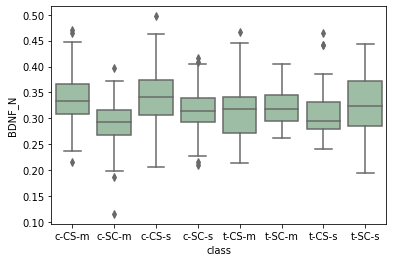

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='class', y='BDNF_N', data=BDNF_N_data, color='#99c2a2')
plt.show()

Похоже, что отличается экспрессия BDNF_N у класса с-SC-m, но надо ANOVA применить (с попарными сравнениями групп) и посмотреть получше

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=BDNF_N_data['BDNF_N'],
                          groups=BDNF_N_data['class'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
c-CS-m c-CS-s   0.0031 0.9993 -0.0137  0.0199  False
c-CS-m c-SC-m  -0.0483    0.0 -0.0647 -0.0319   True
c-CS-m c-SC-s  -0.0258 0.0001 -0.0427  -0.009   True
c-CS-m t-CS-m  -0.0265 0.0001 -0.0433 -0.0096   True
c-CS-m t-CS-s  -0.0338    0.0 -0.0518 -0.0157   True
c-CS-m t-SC-m  -0.0182 0.0243  -0.035 -0.0013   True
c-CS-m t-SC-s  -0.0136 0.2216 -0.0306  0.0033  False
c-CS-s c-SC-m  -0.0514    0.0 -0.0682 -0.0345   True
c-CS-s c-SC-s  -0.0289    0.0 -0.0462 -0.0116   True
c-CS-s t-CS-m  -0.0296    0.0 -0.0469 -0.0123   True
c-CS-s t-CS-s  -0.0369    0.0 -0.0553 -0.0184   True
c-CS-s t-SC-m  -0.0213 0.0049 -0.0385  -0.004   True
c-CS-s t-SC-s  -0.0167  0.069 -0.0341  0.0006  False
c-SC-m c-SC-s   0.0224 0.0014  0.0056  0.0393   True
c-SC-m t-CS-m   0.0218 0.0023  0.0049  0.0386   True
c-SC-m t-CS-s   0.0145 0.2231 -0.0035  0.0326 

## Выводы по экспрессии белка BDNF_N в разных группах мышей : 
- У контрольных мышей экспрессия белка BDNF_N выше у животных, которые испытывали стимуляцию обучаться (CS) по сравнению с необучавшимися (SC) (p<0.05), причем эта закономерность характерна и для мышей, получавших mamantine, и не получавших его.  Иными словами, при стимуляции к обучению повышается экспрессия белка BDNF_N. Любопытно, что среди контрольных мышей, которые не обучались (SC), уровень экспрессии белка был достоверно выше у тех, которые не получали mamantine.  При этом обучавшиеся контрольные мыши, которым вводили и не вводили mamantine, не отличались по экспрессии белка. Иными словами, само по себе введение mamantine не повышает экспрессию белка.

- в группе мышей с синдромом Дауна эти закономерности немного другие. Например, в группе, не получавшей mamantine, особи, которые обучались, продемонстрировали даже сниженную экспрессию белка  BDNF_N по сравнению с теми, которые не обучались. То есть этот белковый паттерн ведет себя по-другому у особей с трисомией при обучении по сравнению с контролями. В этой группе у обучавшихся особей также введение mamantine не оказывало влияния на экспрессию белка BDNF_N.





# 3. Попробовать построить линейную модель, способную предсказать уровень продукции белка ERBB4_N на основании данных о других белках в эксперименте 

У меня есть категориальные переменные в датасете, их надо либо зашифровать, либо избавиться от них. Впрочем,нас тут просят предсказывать экспрессию белка по экспрессии других белков, а не по группам мышей, так что смело удаляем данные о группах.

У меня есть NA в датасете, а модель их не скушает, их надо либо удалить, либо заменить на нули или среднее/медиану. Попробую пока удалить для простоты. 

In [111]:
data_without_NA = data.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
data_without_NA = data_without_NA.dropna()
data_without_NA

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.244469,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.245705,0.184612,0.133317,0.132591,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423
1046,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.261893,0.188972,0.153772,0.132869,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757
1047,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.232715,0.189189,0.146135,0.129793,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494
1048,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.231471,0.208497,0.155311,0.120850,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585


In [114]:
y = data_without_NA['ERBB4_N']
y

75      0.161120
76      0.161529
77      0.181034
78      0.163632
79      0.167972
          ...   
1045    0.179531
1046    0.165545
1047    0.155877
1048    0.172463
1049    0.166251
Name: ERBB4_N, Length: 552, dtype: float64

In [113]:
X = data_without_NA.drop(['ERBB4_N'], axis=1)
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.244469,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.245705,0.184612,0.133317,0.132591,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423
1046,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.261893,0.188972,0.153772,0.132869,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757
1047,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.232715,0.189189,0.146135,0.129793,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494
1048,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.231471,0.208497,0.155311,0.120850,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,
                             mean_squared_error)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) 
LinRegModel = LinearRegression()
LinRegModel.fit(X_train, y_train)
y_pred = LinRegModel.predict(X_test)
print("MSE", mean_squared_error(y_test, y_pred), "MAE", mean_absolute_error(y_test, y_pred), "R2", r2_score(y_test, y_pred) )

MSE 3.472446382292699e-05 MAE 0.0045588540222441356 R2 0.8259613770470067


In [121]:
compare = pd.DataFrame({'y': y_test, 'y_pred': y_pred})
compare

,y,y_pred
321,0.156069,0.159699
999,0.145945,0.155895
83,0.164838,0.168803
873,0.147787,0.148198
79,0.167972,0.168982
...,...,...
937,0.154482,0.150087
921,0.163293,0.154646
905,0.159992,0.161157
181,0.154818,0.164097


# Выводы по предсказаниям: в целом, в таблице отличия не выглядят такими уж ужасающими, абсолютная ошибка  0.005 на этих числах так и ничего, но сама задача кажется странной - на основе данных об экспрессии других белков предсказывать еще один белок... зачем? обычно в таких случаях есть вся панель данных по всем белкам. Ну и интересно предсказывать экспрессию в зависимости от группы, а это уже сложнее

In [133]:
data


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [135]:
data.T.to_csv('Counts.csv') 

In [128]:
!pip install xlwt

In [136]:
type(data.T[])

pandas.core.frame.DataFrame